In [24]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Central Limit Theorem

In [25]:
coin = Table().with_column(
    'Face', ['Heads', 'Tails'],
    'Chance', [0.6, 0.4])
coin


Face,Chance
Heads,0.6
Tails,0.4


In [26]:
sample = coin.sample_from_distribution(1, 1000)
sample

Face,Chance,Chance sample
Heads,0.6,595
Tails,0.4,405


In [27]:
sample.column(2).item(0)

595

In [ ]:
heads = []
for i in np.arange(100000):
    sample = coin.sample_from_distribution(1, 1000)
    heads.append(sample.column(2).item(0))
    
Table().with_column('Heads out of 1000', heads).hist(bins=25)

So we get a bell shape! But how big do our samples have to be?

In [82]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united.show(3)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3


In [ ]:
united.hist('Delay', bins=30)

In [31]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

[mean_delay, sd_delay]

[16.658155515370705, 39.480199851609314]

In [32]:
delay = united.select('Delay')
np.mean(delay.sample(400).column(0))

17.09

In [78]:
means = []
for i in np.arange(10000):
    sample = delay.sample(400)
    means.append(np.mean(sample.column(0)))

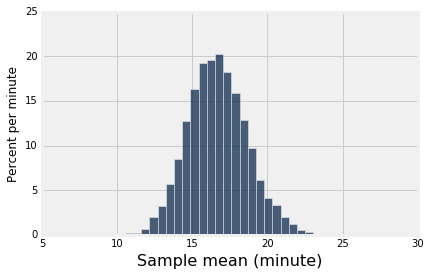

In [79]:
Table().with_column('Sample mean', means).hist(bins=30, unit='minute')

Discussion questions:

What happens if I change the 10000 to 10?

What happens if I change the 400 to 10?

## Variability of the sample mean

In [35]:
def sample_means(sample_size):
    means = []
    for i in np.arange(10000):
        sample = delay.sample(sample_size)
        means.append(np.mean(sample.column(0)))
    return means

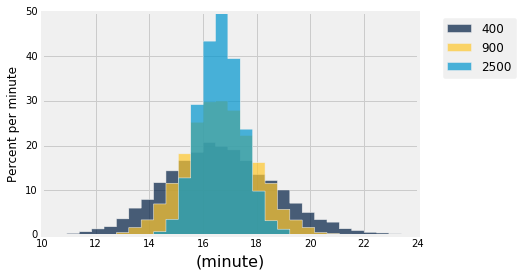

In [36]:
Table().with_column(
    '400', sample_means(400), 
    '900', sample_means(900),
    '2500', sample_means(2500),
).hist(bins=30, unit='minute')

In [37]:
sd_delay

39.480199851609314

In [38]:
def variability(sample_size):
    means = sample_means(sample_size)
    Table().with_column('Sample mean', means).hist(bins=30, unit='minute')
    sqrt_n = np.sqrt(sample_size)
    print('Sample size:          ', sample_size)
    print('Square root n:        ', sqrt_n)
    print('Sample mean SD:       ', np.std(means)) # 7 spaces
    print(sd_delay, '/', sqrt_n, '=', sd_delay / sqrt_n)

Sample size:           400
Square root n:         20.0
Sample mean SD:        2.0005847606
39.4801998516 / 20.0 = 1.97400999258


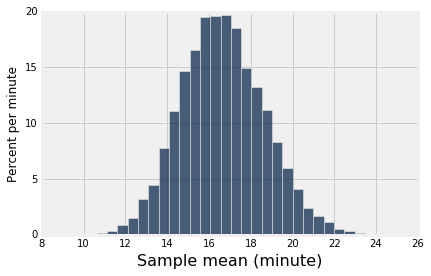

In [39]:
# Try different variabilities up to 2500
variability(400)

Discussion question in slides:

Sample size:           1
Square root n:         1.0
Sample mean SD:        38.7090707756
39.4801998516 / 1.0 = 39.4801998516


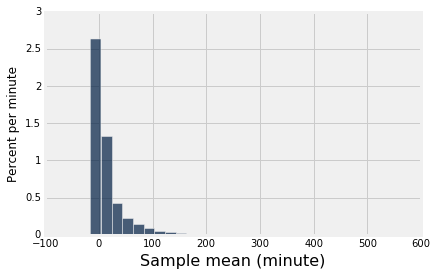

In [44]:
variability(1)

## Experiment Design

In [53]:
votes = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
np.std(votes)

0.5

In [54]:
votes = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.45825756949558394

In [55]:
votes = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.40000000000000008

In [56]:
votes = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
np.std(votes)

0.30000000000000004

In [57]:
votes = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
np.std(votes)

0.45825756949558405

In [58]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
np.std(votes)

0.40000000000000002

In [59]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
np.std(votes)

0.29999999999999999

In [60]:
worst_sd_of_population = 0.5
width_in_sds = 4 # For 95% of a normal distribution, mean +/- 2 SDs
desired_width = 0.03 
sample_size = (worst_sd_of_population * width_in_sds / desired_width) ** 2
sample_size

4444.444444444445

In [61]:
n = 4445

### Conducting the experiment

In [62]:
observed_sample = coin.select(0).sample(n, weights=coin.column('Chance'))
observed_sample

Face
Heads
Tails
Tails
Tails
Tails
Heads
Heads
Heads
Tails
Heads


In [63]:
means = []
for i in np.arange(1000):
    resample = observed_sample.sample()
    means.append(np.count_nonzero(resample.column(0) == 'Heads') / n)
print(percentile(2.5, means), percentile(97.5, means))

0.5714285714285714 0.6008998875140608
